In [31]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

Instead of downloading the dataset manually from kaggle, i used fetch_openml to load the same dataset directly. This fetches both features and target (SalePrice) as a Pandas DataFrame.

In [32]:
ames = fetch_openml(name="house_prices", as_frame=True)
df = ames.frame

I checked the size and feature names of the dataset. This helps understand what kind of data i am working with.

In [33]:
df.shape

(1460, 81)

In [34]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Target Variable Distribution
To understand the distribuition of SalePrice and check normality, skewness or outliers crucial for log transformation and regression models

Text(0.5, 1.0, 'Distribution of Sale Price')

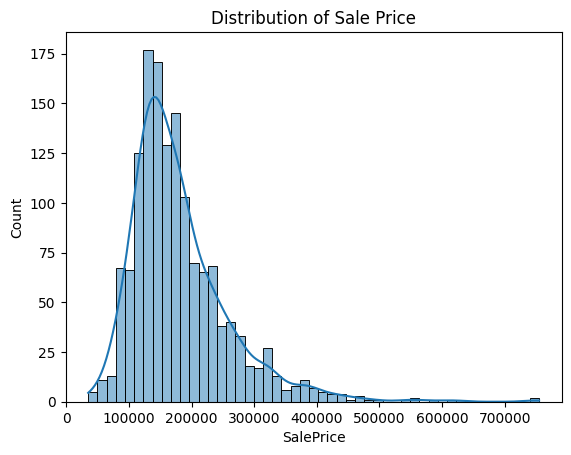

In [35]:
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of Sale Price")

Text(0.5, 1.0, 'Log-Transformed Sale Price Distribution')

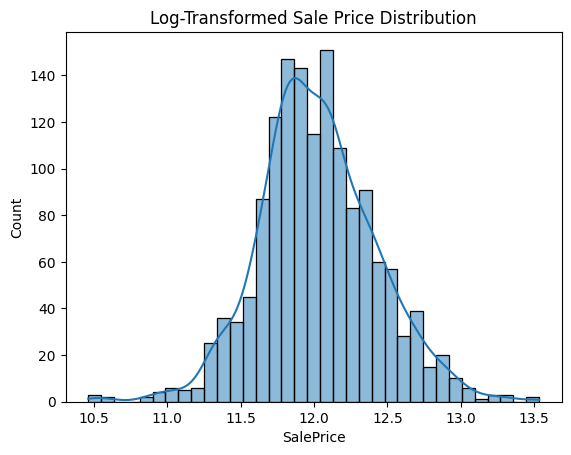

In [36]:
sns.histplot(np.log1p(df["SalePrice"]), kde=True)
plt.title("Log-Transformed Sale Price Distribution")

Correlation Heatmap
To identify which numerical features are strongly correlated with SalePrice. It helps with feature selection.

Text(0.5, 1.0, 'Top Correlated Features')

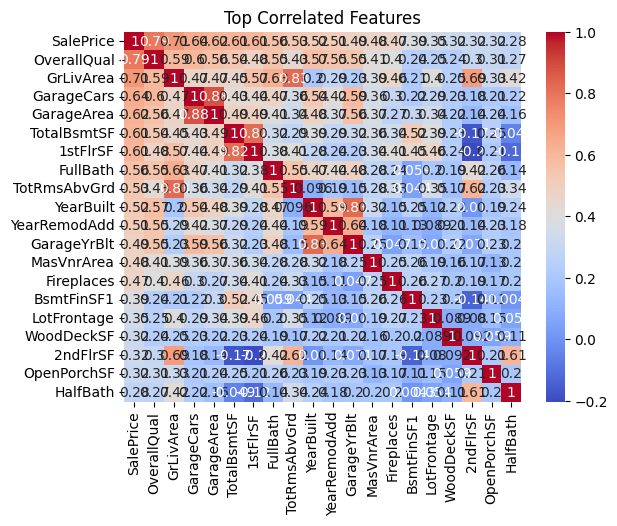

In [37]:
corr = df.corr(numeric_only=True)
top_corr = corr["SalePrice"].abs().sort_values(ascending=False).head(20)
sns.heatmap(df[top_corr.index].corr(),annot=True, cmap="coolwarm")
plt.title("Top Correlated Features")

Scatter Plots: Continuous Features vs SalePrice
To visually assess linear or nonlinear relationships with price

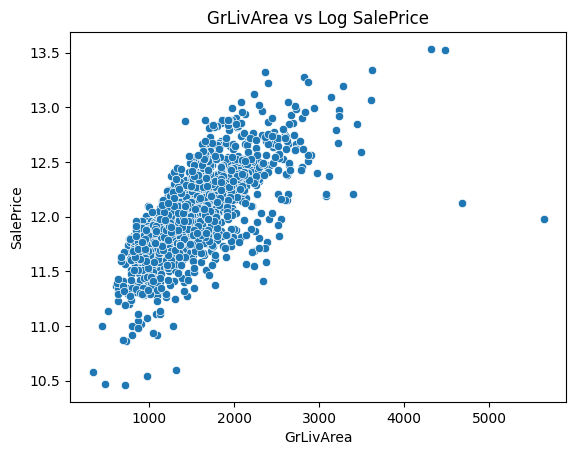

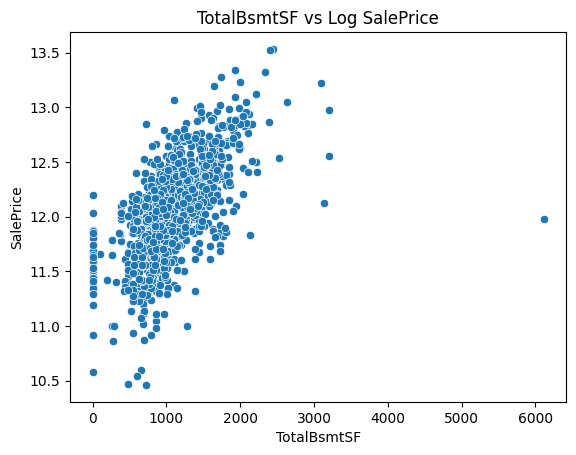

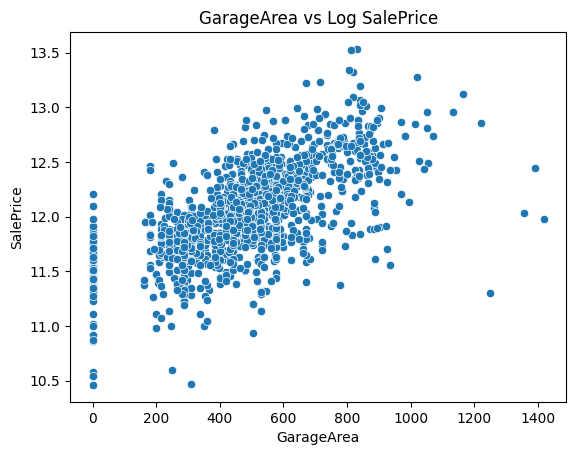

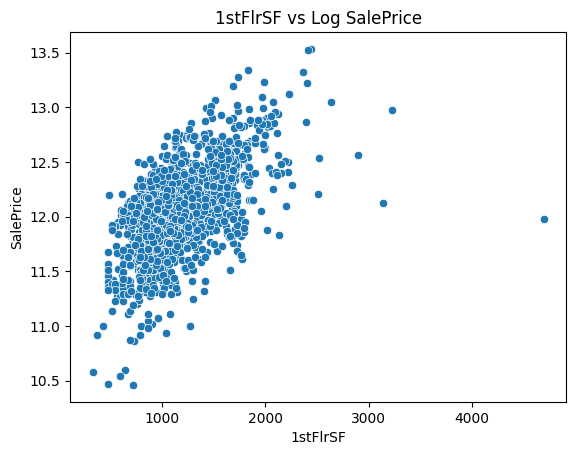

In [38]:
features = ["GrLivArea", "TotalBsmtSF", "GarageArea", "1stFlrSF"]
for feature in features:
    sns.scatterplot(x=df[feature], y=np.log1p(df["SalePrice"]))
    plt.title(f"{feature} vs Log SalePrice")
    plt.show()

Box plots: Categorical features vs saleprice
to see how different categories impact price

Text(0.5, 1.0, 'Neighborhood vs Log SalePrice')

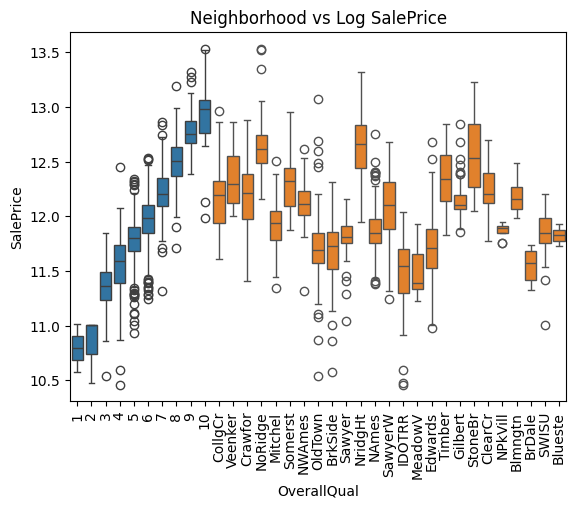

In [39]:
sns.boxplot(x="OverallQual", y=np.log1p(df["SalePrice"]), data=df)
plt.title("Overall Quality vs Log SalePrice")

sns.boxplot(x="Neighborhood", y=np.log1p(df["SalePrice"]), data=df)
plt.xticks(rotation=90)
plt.title("Neighborhood vs Log SalePrice")

Missing Data Heatmap
To visually assess patterns in missing values -- sometimes missingness itself carries predective signal

<Axes: >

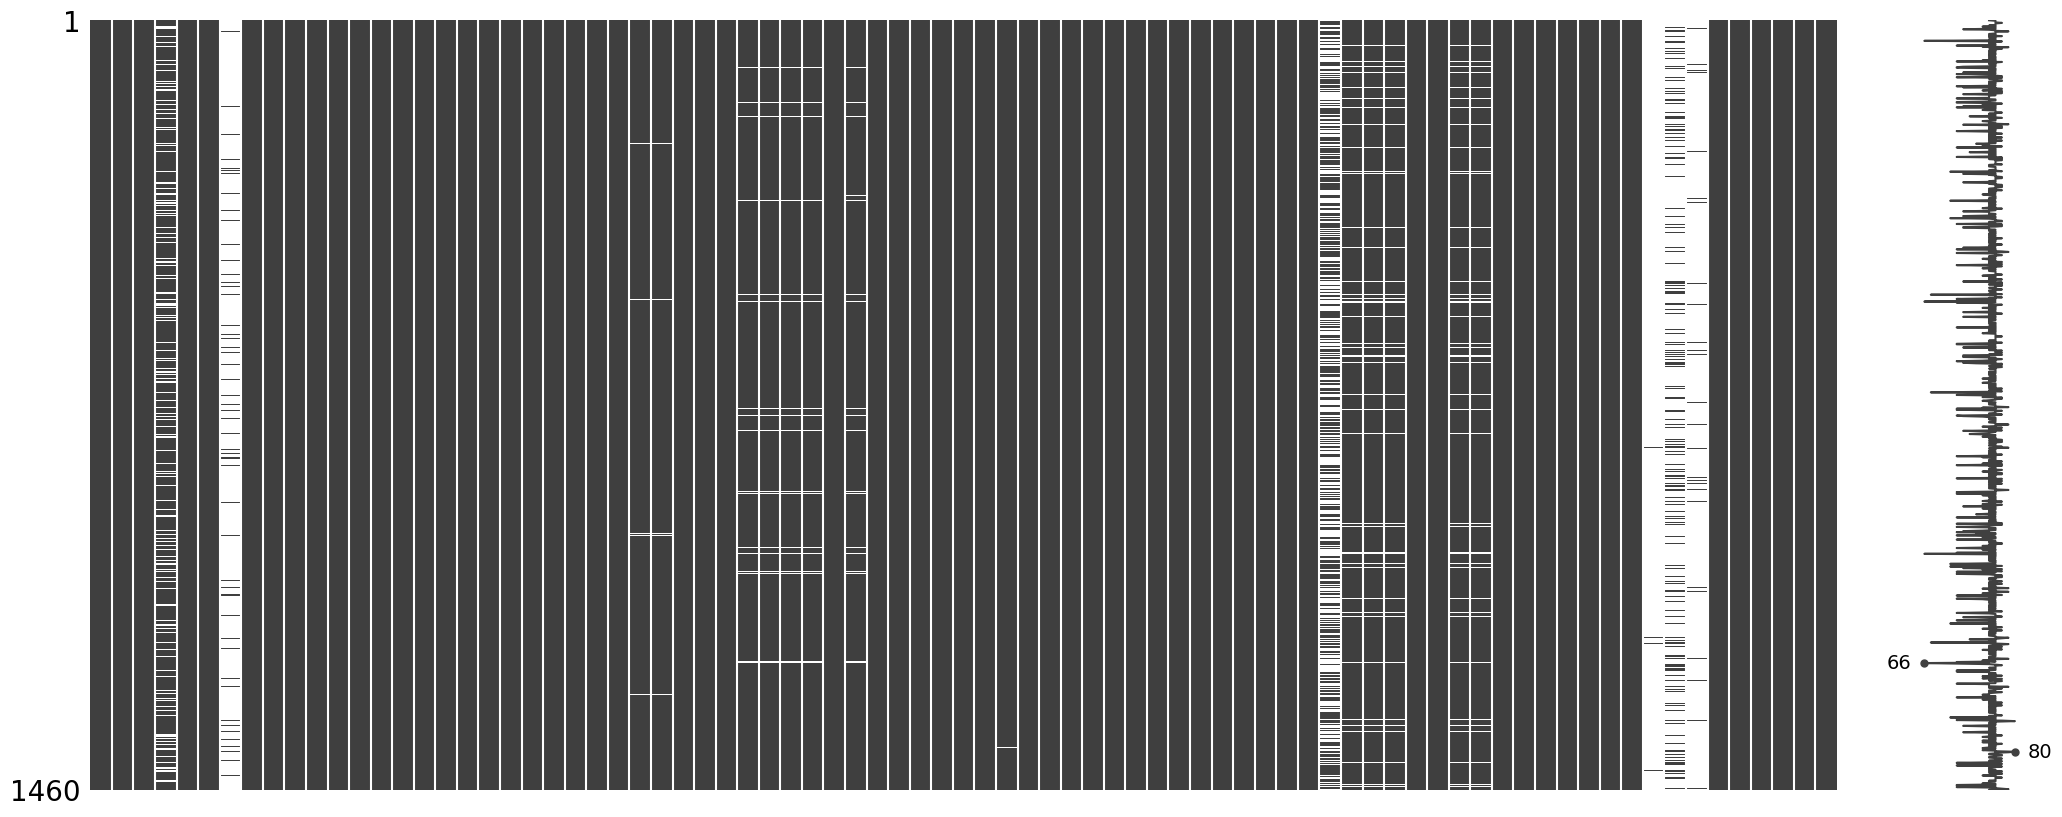

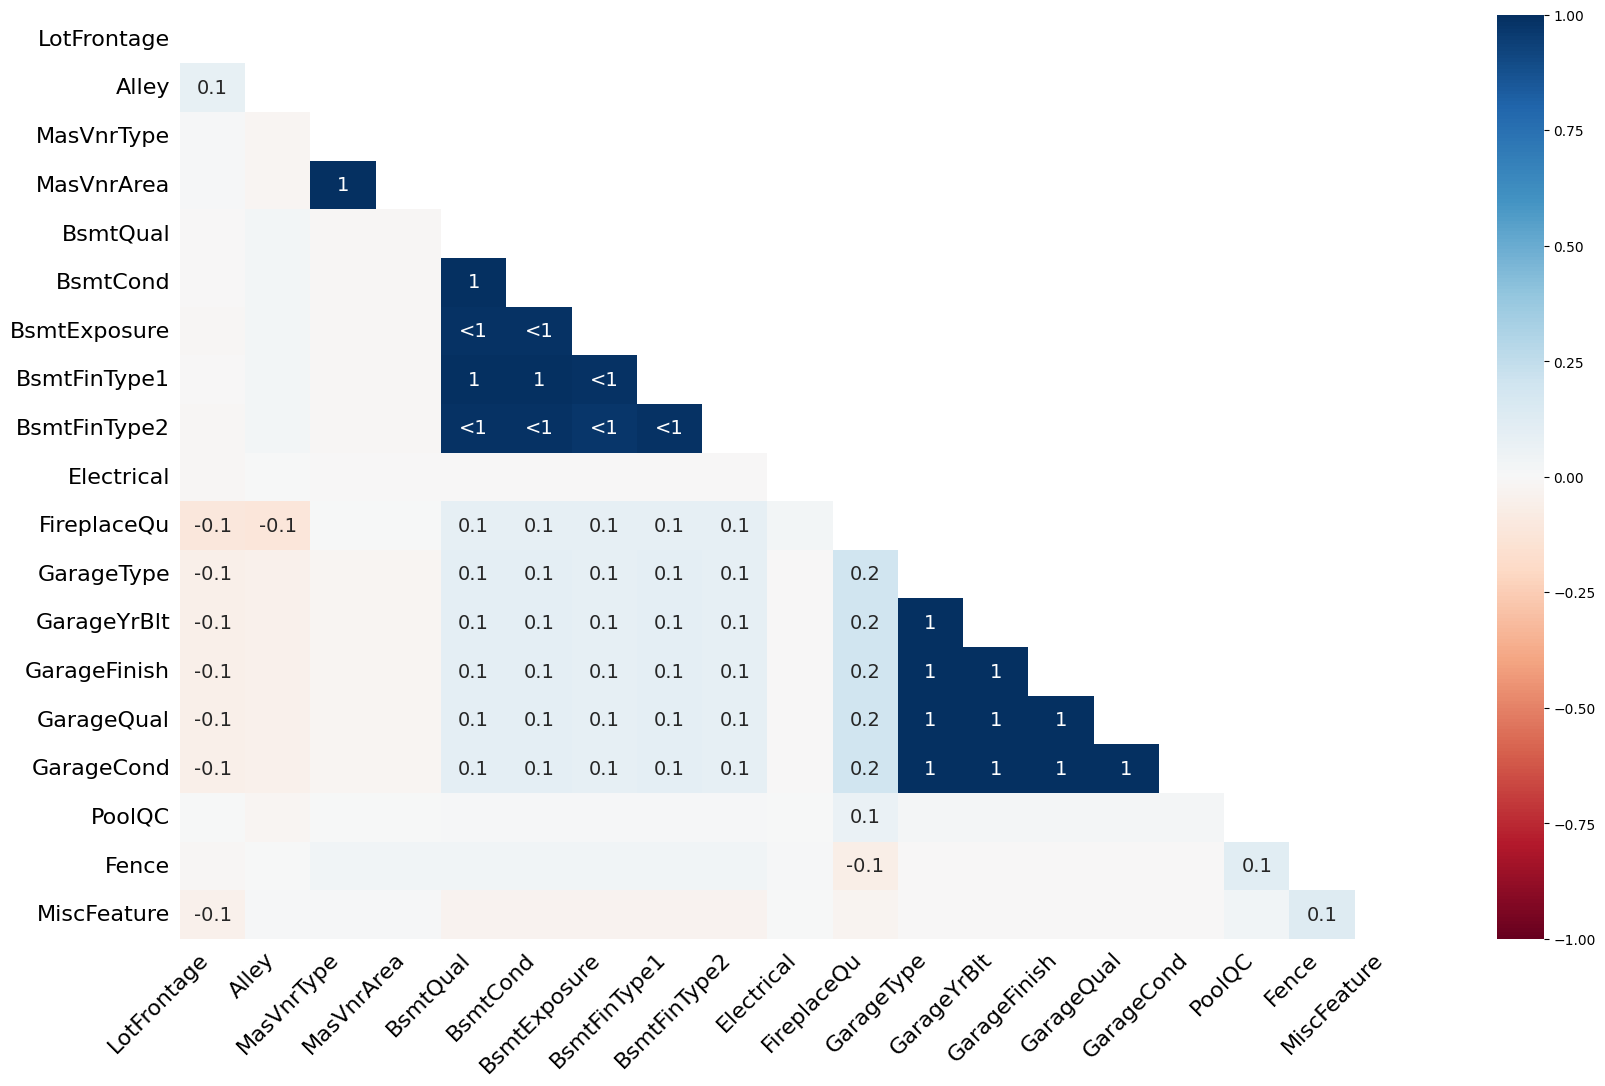

In [40]:
import missingno as msno
msno.matrix(df)
msno.heatmap(df)

Geospatial Patterns (If COORDINATE AVAILABLE)
to assess whether location features impact prices

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

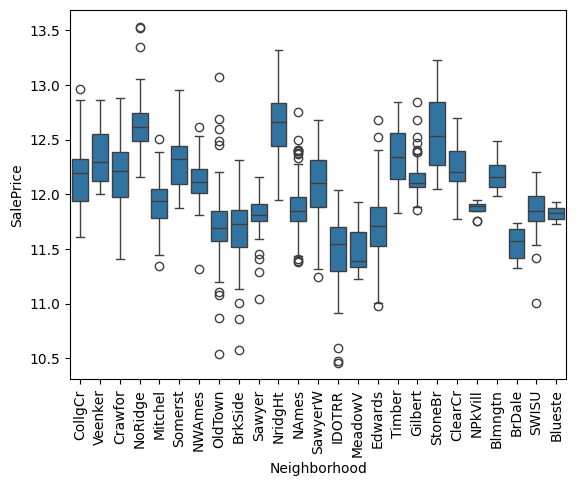

In [41]:
sns.boxplot(x="Neighborhood", y=np.log1p(df["SalePrice"]), data=df)
plt.xticks(rotation=90)

Year Trends
-To explore how home age or year of sale influences price

<Axes: title={'center': 'Year Built vs log saleprice'}, xlabel='YearBuilt', ylabel='SalePrice'>

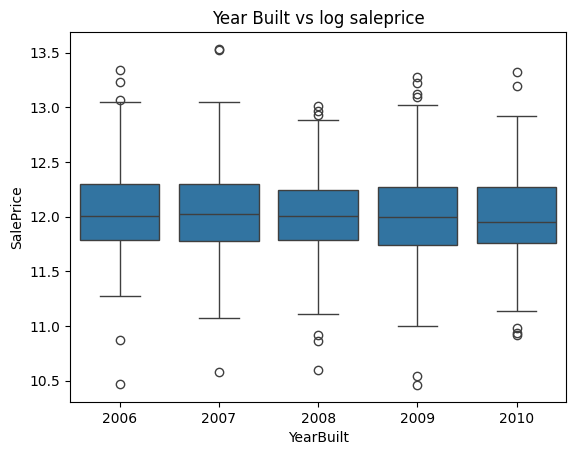

In [42]:
sns.lineplot(x="YearBuilt", y=np.log1p(df["SalePrice"]), data=df)
plt.title("Year Built vs log saleprice")

sns.boxplot(x="YrSold", y=np.log1p(df["SalePrice"]), data=df)

Oulier Detection
-Outliers in variables like GrLivArea, GarageArea or TotalBsmtSF can mislead models

Text(0.5, 1.0, 'Detecting Outliers In GrLivArea')

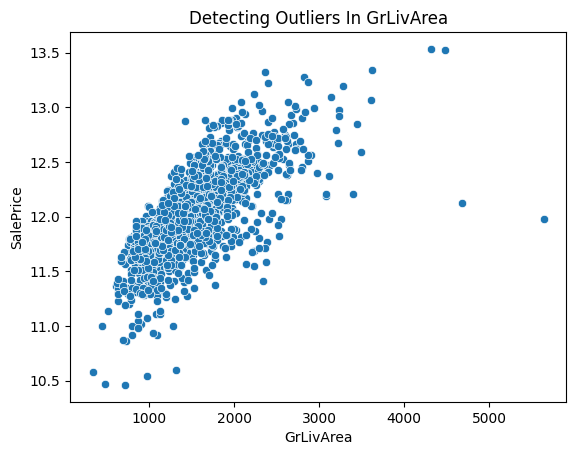

In [43]:
sns.scatterplot(x=df["GrLivArea"], y=np.log1p(df["SalePrice"]))
plt.title("Detecting Outliers In GrLivArea")

Skewness and Transformation
-Highly skewed features can hurt regression performance

In [44]:
skewness = df[numeric_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed = skewness[skewness > 1]
skewed

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
dtype: float64

Principal Component Analysis(PCA)
-To visualize feature space and identify clusters or variance direction(useful for dimensionality reduction)

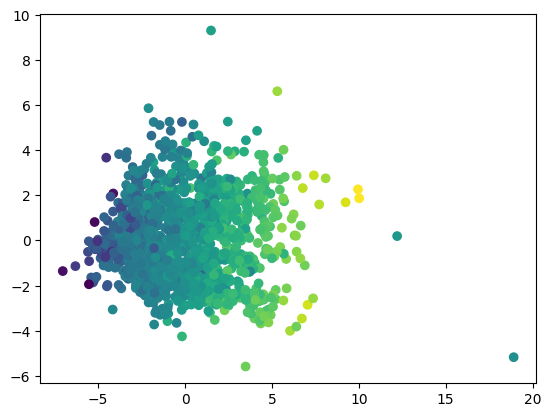

In [54]:
pca= PCA(n_components=2)
x_pca = pca.fit_transform(X[numeric_cols])
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis')

In [45]:
X=df.drop("SalePrice", axis=1)
y=np.log1p(df["SalePrice"])

In [46]:
X=X.fillna({
    col: "None" if X[col].dtype == "object" else X[col].median()
    for col in X.columns
})

In [47]:
X=pd.get_dummies(X)

In [48]:
numeric_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=0.001),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
}

In [51]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse=np.sqrt(mean_squared_error(y_val, preds))
    print(f"{name}: RMSE = {rmse:.4f}")

LinearRegression: RMSE = 0.1321
Ridge: RMSE = 0.1362
Lasso: RMSE = 0.1377
RandomForest: RMSE = 0.1456
GradientBoosting: RMSE = 0.1353


In [52]:
final_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
final_model.fit(X,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300,
                          random_state=42)

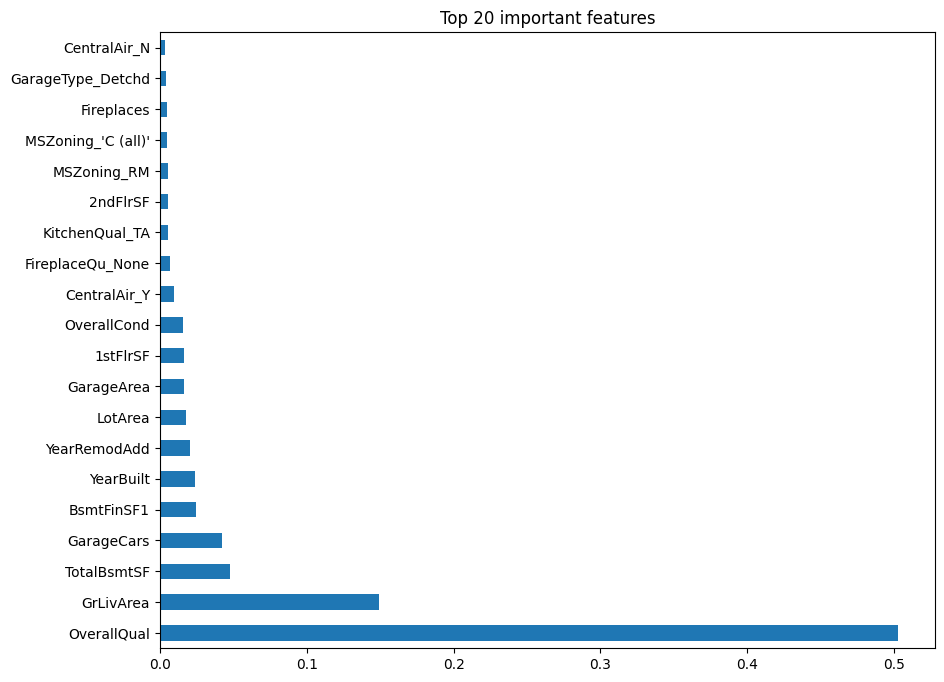

In [53]:
importances= pd.Series(final_model.feature_importances_, index=X.columns)
importances.nlargest(20).plot(kind='barh', figsize=(10,8))
plt.title("Top 20 important features")
plt.show()